<a href="https://colab.research.google.com/github/horria311/ML/blob/main/S5_Machine_Learning_Basics_2-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

Data Shape: (100, 3)
           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1
Shape of Feature Matrix: (100, 1)
Shape Label Vector: (100, 1)


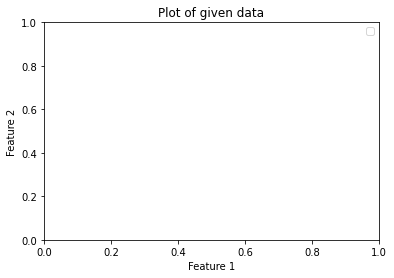

m = 100
n = 100
Learning Rate = 0.0035
Number of Epochs = 500
Epoch 100 Cost: 138.43384552001953
Epoch 200 Cost: 136.75181579589844
Epoch 300 Cost: 135.8441162109375
Epoch 400 Cost: 135.15711212158203


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Feature Matrix

data = pd.read_csv('marks.csv', header = None)
print("Data Shape:", data.shape)
  
print(data.head())
def sigmoid(z):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp( - z))


# Feature Matrix
x_orig = data.iloc[:, 1:-1].values

# Data labels
y_orig = data.iloc[:, -1:].values

print("Shape of Feature Matrix:", x_orig.shape)
print("Shape Label Vector:", y_orig.shape)

# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
                  if y_orig[i] == 1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
                  if y_orig[i] == 0])



plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()

plt.show()
# Creating the One Hot Encoder
oneHot = OneHotEncoder()

# Encoding x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

# Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

alpha, epochs = 0.0035, 500
m, n = x.shape
print('m =', m)
print('n =', n)
print('Learning Rate =', alpha)
print('Number of Epochs =', epochs)
# There are n columns in the feature matrix
# after One Hot Encoding.
tf.compat.v1.disable_eager_execution()
X = tf.placeholder(tf.float32, [None, n])

# Since this is a binary classification problem,
# Y can take only 2 values.
Y = tf.placeholder(tf.float32, [None, 2])

# Trainable Variable Weights
W = tf.Variable(tf.zeros([n, 2]))

# Trainable Variable Bias
b = tf.Variable(tf.zeros([2]))
# Hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(
        logits = Y_hat, labels = Y)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(
  learning_rate = alpha).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()

# Starting the Tensorflow Session
with tf.Session() as sess:

  # Initializing the Variables
  sess.run(init)

  # Lists for storing the changing Cost and Accuracy in every Epoch
  cost_history, accuracy_history = [], []

  # Iterating through all the epochs
  for epoch in range(epochs):
    cost_per_epoch = 0
    
    # Running the Optimizer
    sess.run(optimizer, feed_dict = {X : x, Y : y})
    
    # Calculating cost on current Epoch
    c = sess.run(cost, feed_dict = {X : x, Y : y})
    
    # Calculating accuracy on current Epoch
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                    tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                        tf.float32))
    
    # Storing Cost and Accuracy to the history
    cost_history.append(sum(sum(c)))
    accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
    
    # Displaying result on current Epoch
    if epoch % 100 == 0 and epoch != 0:
      print("Epoch " + str(epoch) + " Cost: "
              + str(cost_history[-1]))

  Weight = sess.run(W) # Optimized Weight
  Bias = sess.run(b) # Optimized Bias

  # Final Accuracy
  correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                  tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                      tf.float32))
  print("\nAccuracy:", accuracy_history[-1], "%")
  
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')
plt.show()
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')

plt.show()
# Calculating the Decision Boundary
decision_boundary_x = np.array([np.min(x_orig[:, 0]),
              np.max(x_orig[:, 0])])

decision_boundary_y = (- 1.0 / Weight[0]) *(decision_boundary_x * Weight + Bias)

decision_boundary_y = [sum(decision_boundary_y[:, 0]), sum(decision_boundary_y[:, 1])]

# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
                  if y_orig[i] == 1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
                  if y_orig[i] == 0])

# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1],color = 'blue', label = 'Positive')

# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1],color = 'red', label = 'Negative')

# Plotting the Decision Boundary
plt.plot(decision_boundary_x, decision_boundary_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of Decision Boundary')
plt.legend()
plt.show()


## Decision Trees

Accuracy: 0.9667


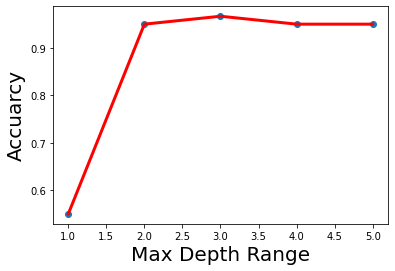

In [78]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
import os

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=17)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))


dot = tree.export_graphviz(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot)
graph.format = 'png'
graph.render('iris', view=True)


# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

plt.scatter(max_depth_range, accuracy)
plt.xlabel('Max Depth Range', fontsize = 20)
plt.ylabel('Accuarcy', fontsize = 20)
plt.plot(max_depth_range, accuracy, color='red', linewidth = 3)
plt.show()


## Adaboost

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#import graphviz

dataset = pd.read_csv('iris.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=100)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

bdt.fit(X_train,y_train)
y_prediction = bdt.predict(X_test)
accuracy=np.mean(y_prediction == y_test)*100
print("The achieved accuracy using Adaboost is " + str(accuracy))
error = []
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_prediction = clf.predict(X_test)
accuracy=np.mean(y_prediction == y_test)*100
print("The achieved accuracy using Decision Tree is " + str(accuracy))


The achieved accuracy using Adaboost is 93.33333333333333
The achieved accuracy using Decision Tree is 93.33333333333333
